Reading data:

In [ ]:
from google.colab import drive
import scipy.io
drive.mount('/content/drive/')
mask_data = scipy.io.loadmat("/content/drive/MyDrive/Data/HW/infmsk_hw1.mat")

Mounted at /content/drive/


In [ ]:
import numpy as np
mask = mask_data['infmsk']
print(mask.shape[2])
background_ctr = []
infection_ctr = []
healthy_ctr = []
mask=np.swapaxes(mask,0,2)
print(mask.shape)
for i in range(mask.shape[0]):
  background_ctr.append(np.count_nonzero(mask[i,:,:] == 0))
  infection_ctr.append(np.count_nonzero(mask[i,:,:] == 1))
  healthy_ctr.append(np.count_nonzero(mask[i,:,:] == 2))

3554
(3554, 512, 512)


In [ ]:
infection_rate = []
for i in range(mask.shape[0]):
  inf_rate = (infection_ctr[i]/(infection_ctr[i]+healthy_ctr[i])) * 100
  infection_rate.append(inf_rate)
healthy=0
mild=0
severe=0
for i in range(len(infection_rate)):
  if(infection_rate[i] == 0.0):
    healthy += 1
  if(infection_rate[i]> 0.0 and infection_rate[i] <= 40.0):
    mild += 1
  if(infection_rate[i] > 40.0):
    severe += 1

Display a sample for each category's infection mask and infection
rate

In [ ]:
print(f"Healthy={healthy} ,Mild={mild} ,Severe={severe}")   #.format(healthy,mild,severe))

Healthy=1441 ,Mild=1954 ,Severe=159


Display a sample for each category's infection mask and infection rate

Mild lung with infection rate 7.576433182761094


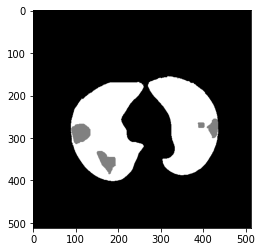

-------------------------
Infection lung with infection rate 0.0


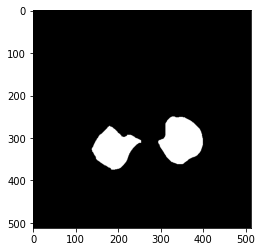

-------------------------
Severe lung with infection rate 40.84584401318199


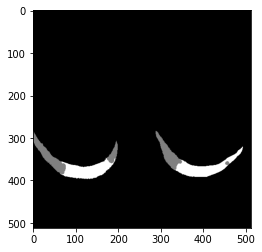

-------------------------


In [ ]:
import matplotlib.pyplot as plt
ctr=0
t1,t2,t3=0,0,0
for i in range(len(infection_rate)):
  if t1 ==1 and t2 == 1 and t3 == 1:
    break
  if i>1000:
    if infection_rate[i] == 0.0 and t1 == 0:
      print(f"Infection lung with infection rate {infection_rate[i]}")
      plt.imshow(np.transpose(mask[i,:,:]),cmap='gray')
      plt.show()
      print("-------------------------")
      t1=1
    if infection_rate[i]> 0.0 and infection_rate[i] <= 40.0 and t2==0:
      print(f"Mild lung with infection rate {infection_rate[i]}")
      plt.imshow(np.transpose(mask[i,:,:]),cmap='gray')
      plt.show()
      print("-------------------------")
      t2=1
    if infection_rate[i] > 40.0 and t3==0:
      print(f"Severe lung with infection rate {infection_rate[i]}")
      plt.imshow(np.transpose(mask[i,:,:]),cmap='gray')
      plt.show()
      print("-------------------------")
      t3=1